# Test Examples for `FOWDR`

## Huaiyu Duan (University of New Mexico)

## Example 1

This test uses the ELN distribution $G(u)= a - u$, where $u$ is a number. 

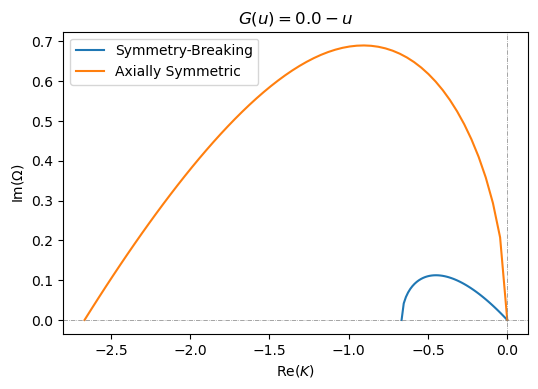

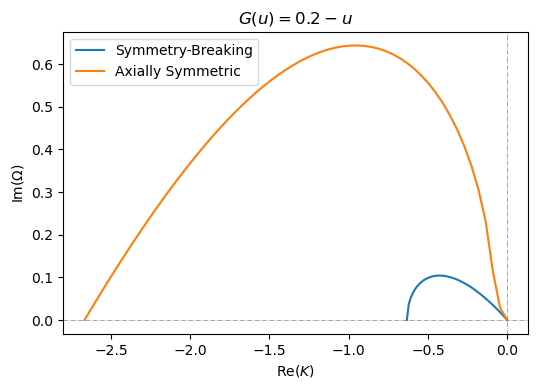

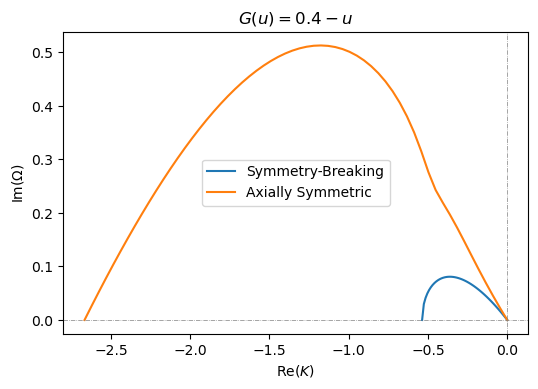

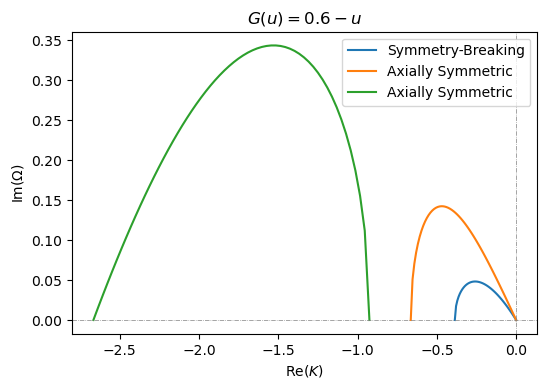

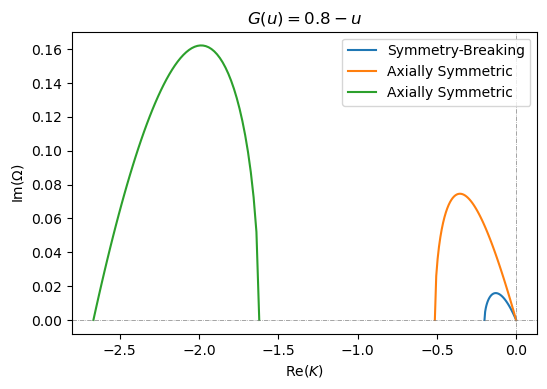

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fowdr import asdr, sbdr
from scipy.integrate import quad

for a in np.arange(0., 1., 0.2):
    Gs = lambda u: a - u
    
    dr1 = sbdr.DR_complexOmega(Gs, num_pts=50, shift=False, rt_opts={'method': 'lm'})
    dr2 = asdr.DR_complexOmega(Gs, num_pts=60, shift=False)
    plt.figure(dpi=100)
    # plt.style.use('dark_background')

    for kk, ww in dr1:
        plt.plot(kk, ww.imag, label='Symmetry-Breaking')
    for kk, ww in dr2:
        plt.plot(kk, ww.imag, label='Axially Symmetric')

    plt.axhline(0, ls='-.', color='grey', lw=0.5)
    plt.axvline(0, ls='-.', color='grey', lw=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.legend()
    plt.xlabel('Re($K$)')
    plt.ylabel('Im($\Omega$)')
    plt.title(f'$G(u)={a:.1f}-u$')
    plt.show()

## Example 2

This test uses the ELN distributions $G_i$ ($i=1,2,\ldots,6$) defined in [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005).

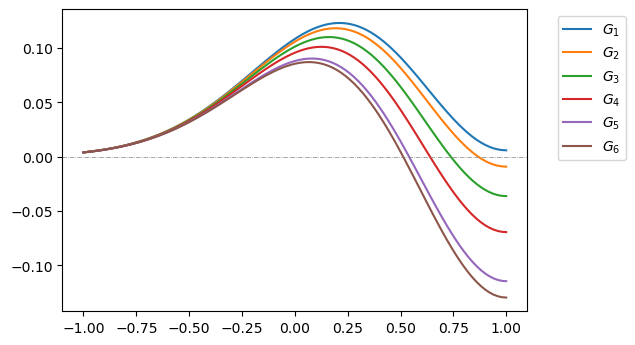

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fowdr import asdr, sbdr
from scipy.integrate import quad

def g_proto(u0, s):
    return lambda u: np.exp(-(u-u0)**2/(2*s**2))
alpha = [1, 0.88, 0.89, 0.908, 0.93, 0.96, 0.97]
sigma = [0.6, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53]
g = [g_proto(1, s) for s in sigma]
def G_proto(a, f):
    n0, *_ = quad(g[0], -1, 1)
    nf, *_ = quad(f, -1, 1)
    a /= nf
    return lambda u: g[0](u)/n0 - a*f(u)
G = [G_proto(a, f) for a,f in zip(alpha, g) ]

uu = np.linspace(-1, 1, 101)
plt.figure(dpi=100)
for i in range(1, len(alpha)):
    plt.plot(uu, G[i](uu), label=f'$G_{i}$')

plt.axhline(0, ls='-.', color='grey', lw=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

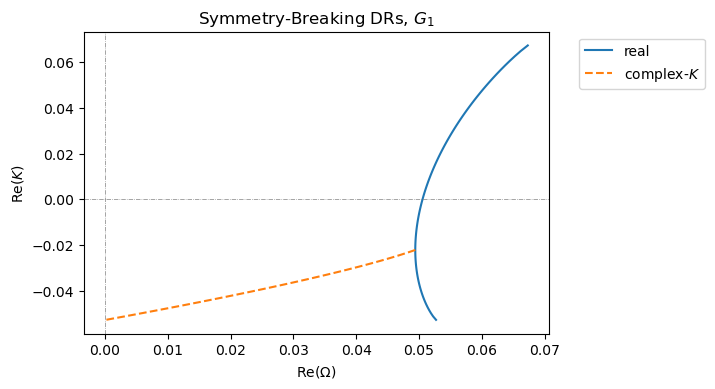

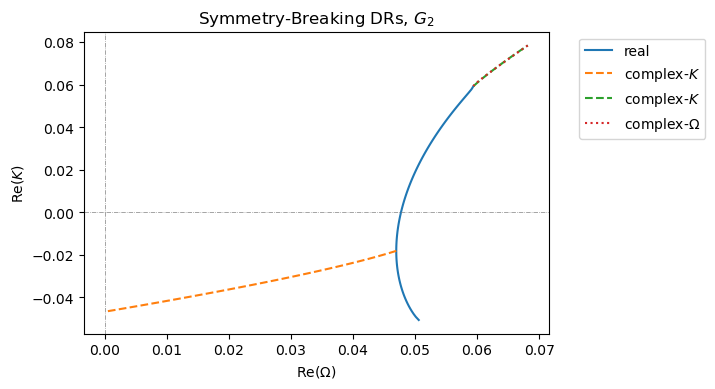

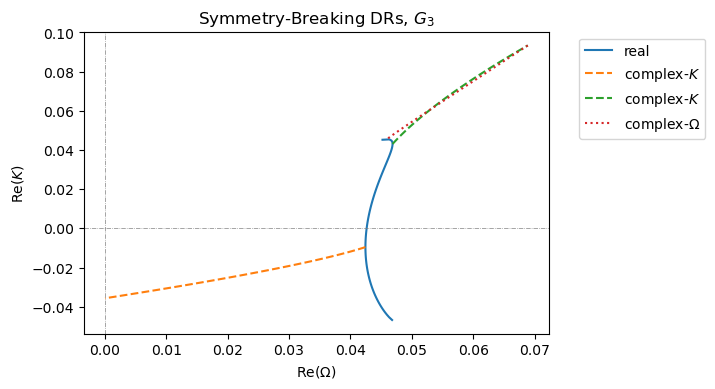

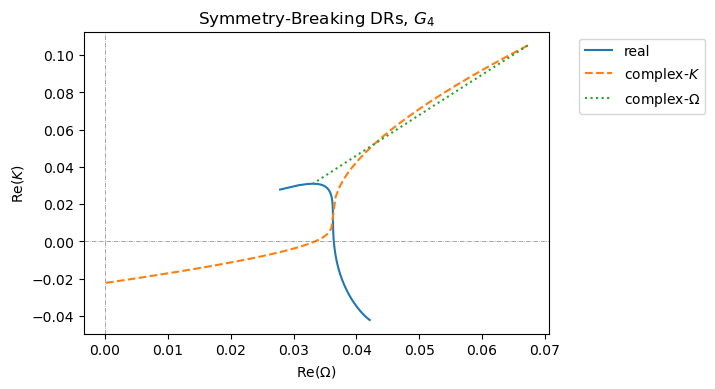

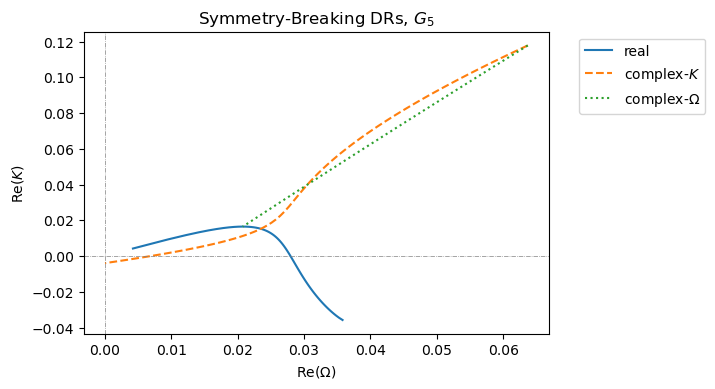

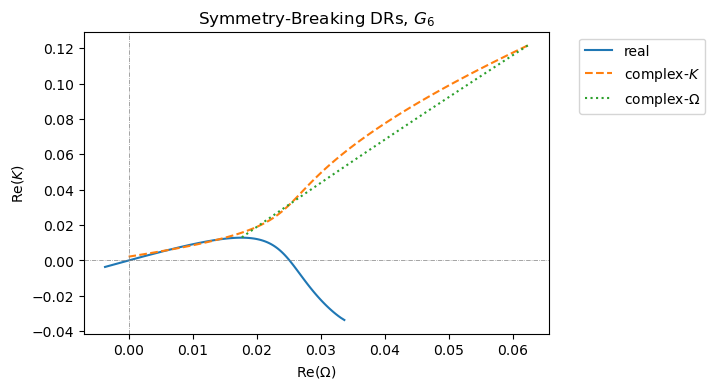

In [3]:
for i in range(1, 7):
    plt.figure(dpi=100)
    # plot the symmetry-preserving DRs
    for kk, ww in sbdr.DR_real(G[i]): # real DR
        plt.plot(ww, kk, '-', label='real')
    for kk, ww in sbdr.DR_complexK(G[i], eps=1e-7): # complex-K DR
        plt.plot(ww, kk.real, '--', label='complex-$K$')
    for kk, ww in sbdr.DR_complexOmega(G[i], eps=1e-7): # complex-Omega DR
        plt.plot(ww.real, kk, ':', label='complex-$\Omega$')

    plt.axhline(0, ls='-.', color='grey', lw=0.5)
    plt.axvline(0, ls='-.', color='grey', lw=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.ylabel('Re($K$)')
    plt.xlabel('Re($\Omega$)')
    plt.title(f'Symmetry-Breaking DRs, $G_{i}$')
    plt.show()

Cannot locate n exactly for K = -0.2 on the real branch. Use -1.0 instead.
Cannot locate n exactly for K = 0.1 on the real branch. Use 1.0 instead.
Cannot locate n exactly for K = -0.2 on the real branch. Use 1.0 instead.


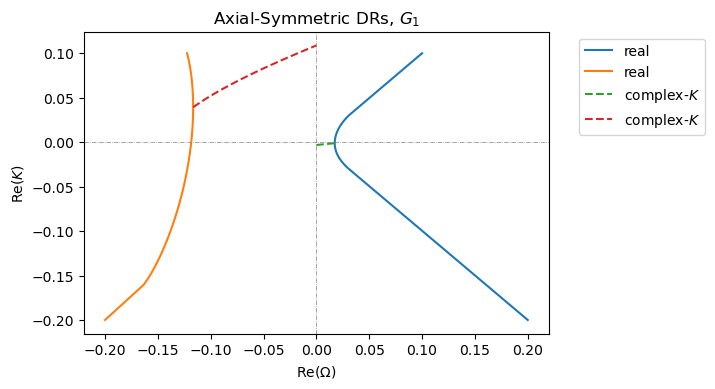

Cannot locate n exactly for K = -0.2 on the real branch. Use -1 instead.


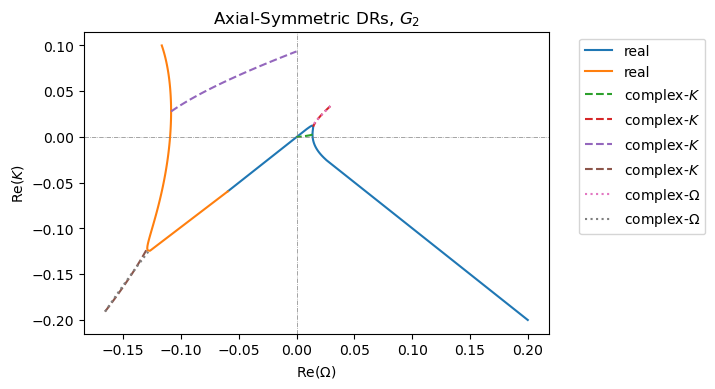

Cannot locate n exactly for K = -0.2 on the real branch. Use -1 instead.


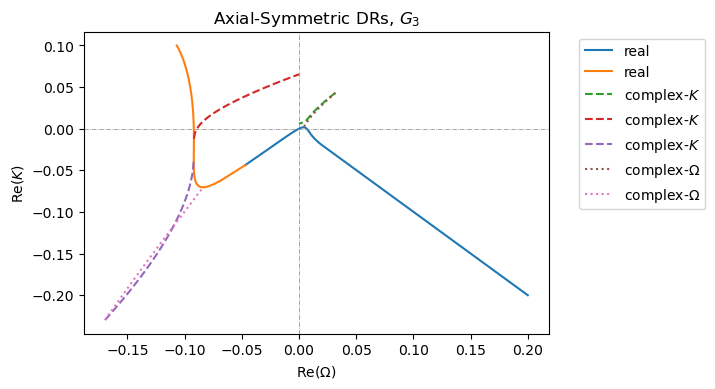

Cannot locate n exactly for K = -0.2 on the real branch. Use -1 instead.


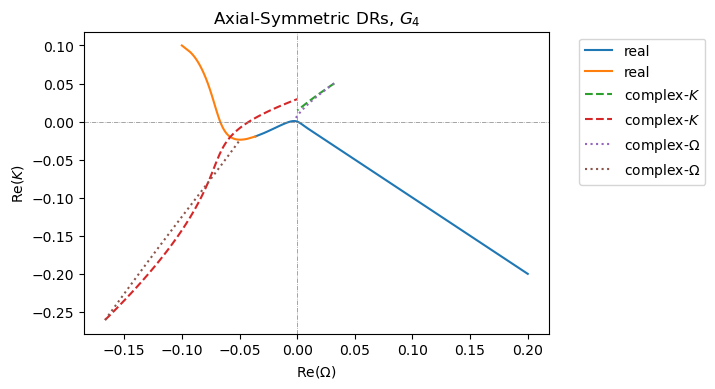

Cannot locate n exactly for K = -0.2 on the real branch. Use -1 instead.
Cannot locate n exactly for K = 0.1 on the real branch. Use -1 instead.


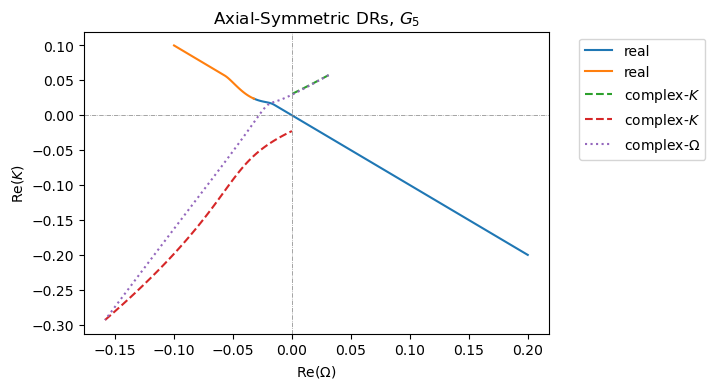

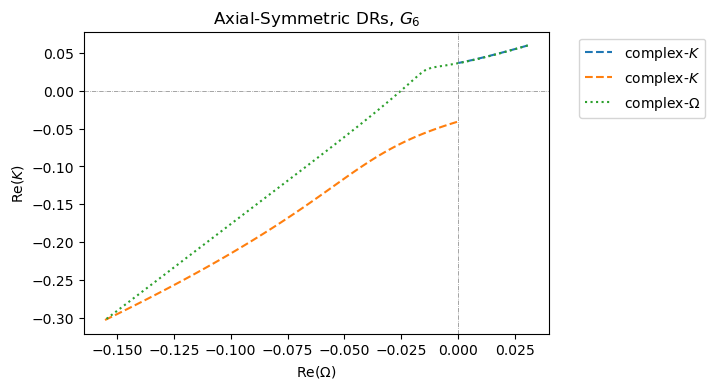

In [4]:
for i in range(1, 7):
    plt.figure(dpi=100)
    # plot the symmetry-preserving DRs
    for kk, ww in asdr.DR_real(G[i], maxK=0.1, minK=-0.2): # real DR
        plt.plot(ww, kk, '-', label='real')
    for kk, ww in asdr.DR_complexK(G[i]): # complex-K DR
        plt.plot(ww, kk.real, '--', label='complex-$K$')
    for kk, ww in asdr.DR_complexOmega(G[i]): # complex-Omega DR
        plt.plot(ww.real, kk, ':', label='complex-$\Omega$')

    plt.axhline(0, ls='-.', color='grey', lw=0.5)
    plt.axvline(0, ls='-.', color='grey', lw=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.ylabel('Re($K$)')
    plt.xlabel('Re($\Omega$)')
    plt.title(f'Axial-Symmetric DRs, $G_{i}$')
    plt.show()

## Acknowledgements

This material is based upon work supported by the U.S. Department of Energy, Office of Science, Office of Nuclear Physics under Award Number DE-SC-0017803.